In [70]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image, ImageOps, ImageFilter, ImageEnhance


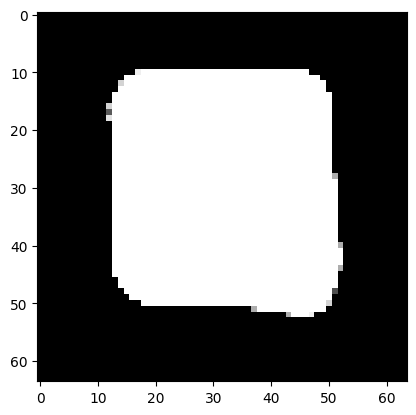

In [71]:
img = cv2.imread("ctverec.png")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# enhance
img_pil = Image.fromarray(img_gray)
img_pil = img_pil.filter(ImageFilter.EDGE_ENHANCE_MORE)
img = np.array(img_pil)

imshow(img, cmap="gray")


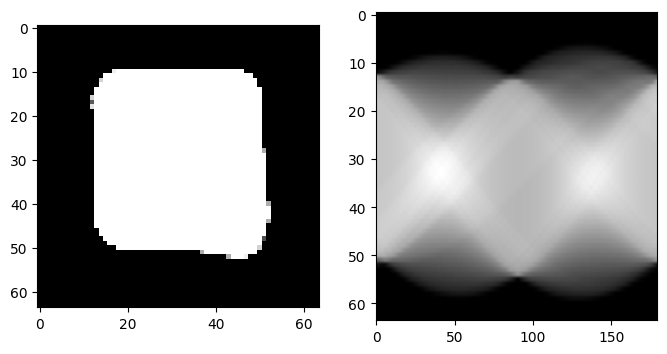

In [72]:
from skimage.transform import radon

# Perform Radon transform
theta = np.linspace(0.0, 180.0, 180, endpoint=False)
sinogram = radon(img, theta=theta, circle=True)

# Display the result
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
imshow(img, cmap="gray")

plt.subplot(1, 2, 2)
plt.imshow(sinogram, cmap="gray", aspect="auto")
plt.show()


In [73]:
def get_pos_angle(sinogram):
    pos, angle = np.unravel_index(np.argmax(sinogram, axis=None), sinogram.shape)

    return pos, angle


In [74]:
def get_vectors(pos, angle):
    vector = np.array([np.cos(np.deg2rad(angle)), np.sin(np.deg2rad(angle))])
    unit_vector = vector / np.linalg.norm(vector)
    unit_vector

    normal_vector = np.array([-unit_vector[1], unit_vector[0]])
    normal_vector

    return unit_vector, normal_vector


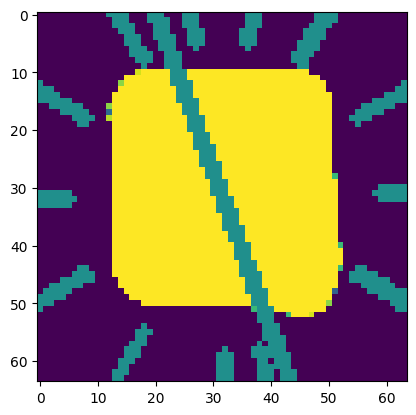

In [96]:
pos, angle = get_pos_angle(sinogram)
pos = 0
angle = 340
unit, normal = get_vectors(pos, angle)

start = np.array([32, 32]) + normal * 127
end = start - normal * 200

cv2.line(img, tuple(start.astype(int)), tuple(end.astype(int)), 127, 2)

imshow(img)
